<a href="https://colab.research.google.com/github/diego2017003/ImersaoDados/blob/main/Aula5_ImersaoDados_Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafios
---
###Desafio 01: Tente outros modelos ou mude os parâmetros dos modelos que testamos em aula.

###Desafio 02: Estude a documentação do Sklearn.

###Desafio 03: Pesquisar o fluxograma 'Escolhendo o melhor modelo' choosing the right estimator 

###Desafio 04: Teste outras problemas (perguntas). 0, 1 ou +.

###Desafio 05: Escolha a droga mais utilizada e tente criar um modelo para prever está label. 

###Desafio 06: Resumo do que você aprendeu com os dados

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')
dados = dados.rename(columns=lambda x: "".join(x.split("-")))
dados.rename(columns={'droga': 'composto'}, inplace=True)
dados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [ ]:
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#modificações feitas na aula 4 sobre as tabelas
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)
#merge de dados com dados_resultados
dados_combinados = pd.merge(dados, dados_resultados[['id','n_moa', 'ativo_moa']], on='id')
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


#Desafio 1
---

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
dados_combinados_Genes = dados_combinados.loc[:,'g0':'g771']
dados_combinados_Genes['ativo_moa'] = dados_combinados['ativo_moa']                        

x = dados_combinados_Genes.select_dtypes('float64')
y = dados_combinados_Genes['ativo_moa']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2)
print(x_treino)
modelo_rlogistica = LogisticRegression(max_iter=10)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

           g0      g1      g2      g3  ...    g768    g769    g770    g771
22191  6.8600 -0.3492  0.7954  0.4382  ... -1.6030 -1.7650 -4.6020  3.6660
9548  -0.6897 -0.7018  0.5212 -1.3220  ... -0.4510 -0.5680 -0.3035  0.0930
14061 -0.9505 -0.4427 -0.8673  0.1690  ...  0.2235 -0.5855 -0.0357 -0.1833
5756   0.2704  0.7330  0.1172  0.6539  ...  0.1197 -0.4340  0.0918 -0.6465
12537  1.5960  0.3985 -0.2575  0.7153  ... -0.0570 -1.0110 -1.1350 -0.4290
...       ...     ...     ...     ...  ...     ...     ...     ...     ...
22602  0.9431  0.2217 -1.3350  0.4192  ...  0.5064  0.4851  0.8651 -0.3304
13436 -0.8334 -1.3240 -0.9438  0.5275  ...  0.0748 -0.3609  0.2367 -0.3753
8442  -0.7933  0.3771 -0.5596  0.3217  ... -0.2684 -0.1931  0.2773  1.1090
3928  -0.9370  0.0403 -0.1405 -0.1912  ... -0.2857  0.5922  0.6944  0.0000
325   -0.2508 -0.0551  0.4610 -0.1686  ...  0.2569  0.3583 -1.7590  0.1892

[19051 rows x 772 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.631954650430401

0.6113793827419693
[[0.86032944 0.13967056]
 [0.78096268 0.21903732]]
[[2507  407]
 [1444  405]]


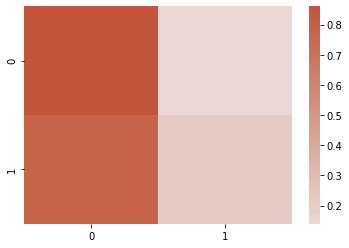

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
dados_combinados_Genes = dados_combinados.loc[:,'c0':'c99']
dados_combinados_Genes['ativo_moa'] = dados_combinados['ativo_moa']                        

x = dados_combinados_Genes.select_dtypes('float64')
y = dados_combinados_Genes['ativo_moa']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2)

modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
print(modelo_rlogistica.score(x_teste, y_teste))
y_predict = modelo_rlogistica.predict(x_teste)
print(metrics.confusion_matrix(y_true=y_teste,y_pred=y_predict,labels=[1,0],normalize='true'))
mc = metrics.confusion_matrix(y_true=y_teste,y_pred=y_predict,labels=[1,0],normalize='true')
print(metrics.confusion_matrix(y_true=y_teste,y_pred=y_predict,labels=[1,0]))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mc, cmap=cmap, center=0)
plt.show()

Observamos que ao criar um modelo de classificação que analisa os valores dos genes e dos tipos celulares nós chegamos a um valor de score baixo com valores entre [0.5,0.7]. Devido a esses valores baixos nos próximos códigos tentar fazer a classificação com uma coluna objetivo diferente, Daqui pra frente o modelo irá pegar os valores dos tipos celulares e dos genes e tentará dizer se 1 efeito MOA específico foi ativado naquela configuração. A escolha do efeito a ser analisado será feita a partir do ranking de maior número de ocorrências na tabela resultados.   

In [70]:
cm = dados_resultados.drop(['id','n_moa','ativo_moa'], axis=1).sum().sort_values(ascending=False)
cm

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

0.9861431870669746
[[0.84      0.16     ]
 [0.0091047 0.9908953]]
[[ 126   24]
 [  42 4571]]


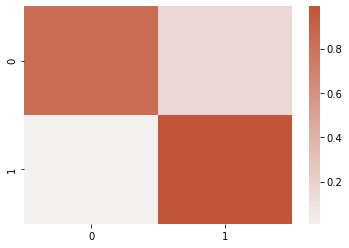

In [126]:
from sklearn import metrics
dados_combinados2 = pd.merge(dados, dados_resultados[['id','nfkb_inhibitor']], on='id')
dados_combinados_Genes = dados_combinados2.loc[:,'g0':'c99']
dados_combinados_Genes['nfkb_inhibitor'] = dados_combinados2['nfkb_inhibitor']                        

x = dados_combinados_Genes.select_dtypes('float64')
y = dados_combinados_Genes['nfkb_inhibitor']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2)
modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
print(modelo_rlogistica.score(x_teste, y_teste))

x_predict = dados_combinados_Genes.loc[1,'g0':'c99']
y_predict = modelo_rlogistica.predict(x_teste)
print(metrics.confusion_matrix(y_true=y_teste,y_pred=y_predict,labels=[1,0],normalize='true'))
mc = metrics.confusion_matrix(y_true=y_teste,y_pred=y_predict,labels=[1,0],normalize='true')
print(metrics.confusion_matrix(y_true=y_teste,y_pred=y_predict,labels=[1,0]))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mc, cmap=cmap, center=0)
plt.show()

0.9997900482888935
[[ 163    0]
 [   1 4599]]


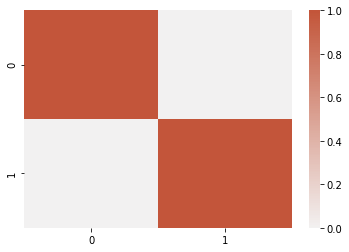

In [117]:
dados_combinados2 = pd.merge(dados, dados_resultados[['id','proteasome_inhibitor']], on='id')
dados_combinados_Genes = dados_combinados2.loc[:,'g0':'c99']
dados_combinados_Genes['proteasome_inhibitor'] = dados_combinados2['proteasome_inhibitor']                        

x = dados_combinados_Genes.select_dtypes('float64')
y = dados_combinados_Genes['proteasome_inhibitor']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2)
modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
print(modelo_rlogistica.score(x_teste, y_teste))
x_predict = dados_combinados_Genes.loc[1,'g0':'c99']
y_predict = modelo_rlogistica.predict(x_teste)
mc = metrics.confusion_matrix(y_true=y_teste,y_pred=y_predict,labels=[1,0],normalize='true')
print(metrics.confusion_matrix(y_true=y_teste,y_pred=y_predict,labels=[1,0]))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mc, cmap=cmap, center=0)
plt.show()

0.9997900482888935
[[0. 1.]
 [0. 1.]]
[[   0    1]
 [   0 4762]]


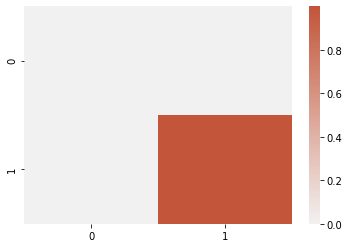

In [119]:
from sklearn import metrics
dados_combinados2 = pd.merge(dados, dados_resultados[['id','diuretic']], on='id')
dados_combinados_Genes = dados_combinados2.loc[:,'g0':'c99']
dados_combinados_Genes['diuretic'] = dados_combinados2['diuretic']                        

x = dados_combinados_Genes.select_dtypes('float64')
y = dados_combinados_Genes['diuretic']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2)
modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
print(modelo_rlogistica.score(x_teste, y_teste))
x_predict = dados_combinados_Genes.loc[1,'g0':'c99']
y_predict = modelo_rlogistica.predict(x_teste)
print(metrics.confusion_matrix(y_true=y_teste,y_pred=y_predict,labels=[1,0],normalize='true'))
mc = metrics.confusion_matrix(y_true=y_teste,y_pred=y_predict,labels=[1,0],normalize='pred')
print(metrics.confusion_matrix(y_true=y_teste,y_pred=y_predict,labels=[1,0]))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mc, cmap=cmap, center=0)
plt.show()

Como observado nos scores dos 3 códigos acima. A inferência feita para um tipo de efeito MOA especifico possui um score relativamente alto próximo a 100%. Dessa maneira podemos imaginar que talvez que as configurações dos genes e dos tipos celulares não necessariamente podem ser generalizados para simplesmente responder se aquela configuração corresponde a uma ativação genérica e o conjunto de ativações deve gerar configurações diferentes em cada conjunto de genes e conjunto de células. Entretanto ainda tentaremos um outro método de Inteligência artificial para tentar fazer a predição utilizando o valor ativo_moa 


In [85]:
from sklearn import svm
import sklearn
dados_combinados_Genes = dados_combinados.loc[:,'c0':'c99']
dados_combinados_Genes['ativo_moa'] = dados_combinados['ativo_moa']                        

x = dados_combinados_Genes.select_dtypes('float64')
y = dados_combinados_Genes['ativo_moa']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2)
clf = svm.SVC(max_iter=1000)
clf.fit(x_treino, y_treino)
clf.score(x_teste,y_teste)

#O SVM também não apresenta um resultado de classificação satisfatório por mais que seja
#Um método aconselhável para classes não linearmente separáveis devida 

0.6246063405416754

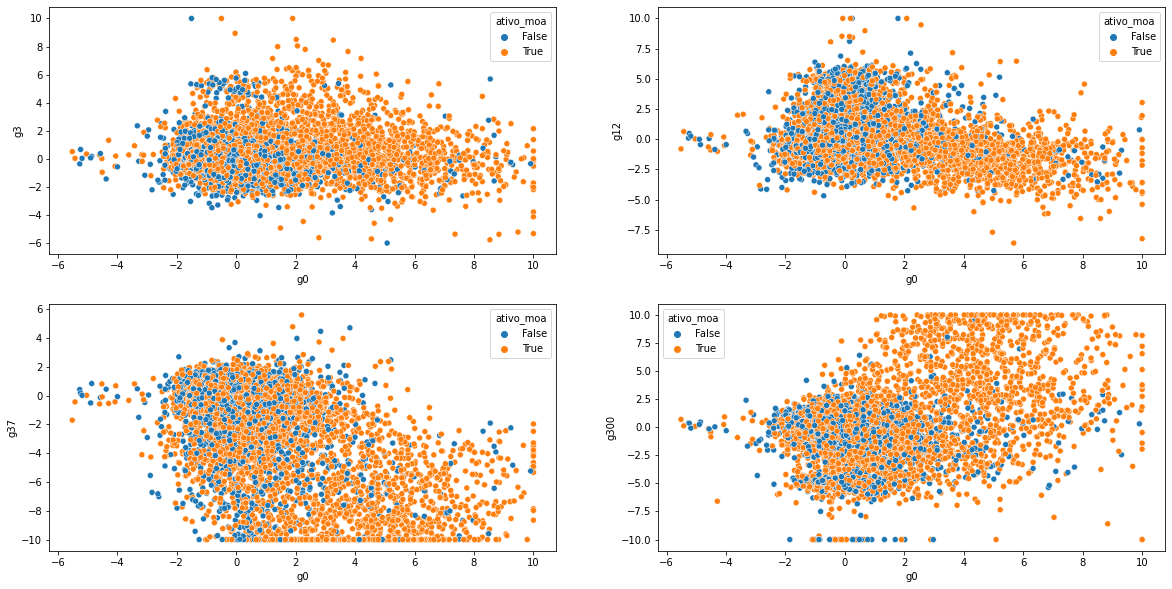

In [78]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.scatterplot(x='g0', y = 'g3', data=dados_combinados, hue='ativo_moa')
plt.subplot(2,2,2)
sns.scatterplot(x='g0', y = 'g12', data=dados_combinados, hue='ativo_moa')
plt.subplot(2,2,3)
sns.scatterplot(x='g0', y = 'g37', data=dados_combinados, hue='ativo_moa')
plt.subplot(2,2,4)
sns.scatterplot(x='g0', y = 'g300', data=dados_combinados, hue='ativo_moa')

Os scatterplot's acima agruparam 4 genes aleátorios ao gene g0 e com hue=ativo_moa. É possível observar que o valor de ativo_moa não permite que cremos uma função que possibilite a separação dos genes por meio de uma função linear. Dessa forma, podemos pensar que o valor de ativo_moa pode não ser uma classe tão boa para representar a classe objetivo de uma ML. A seguir iremos plotar os mesmo scatterPlots modificando somente o valor de HUE para um efeito moa específico   

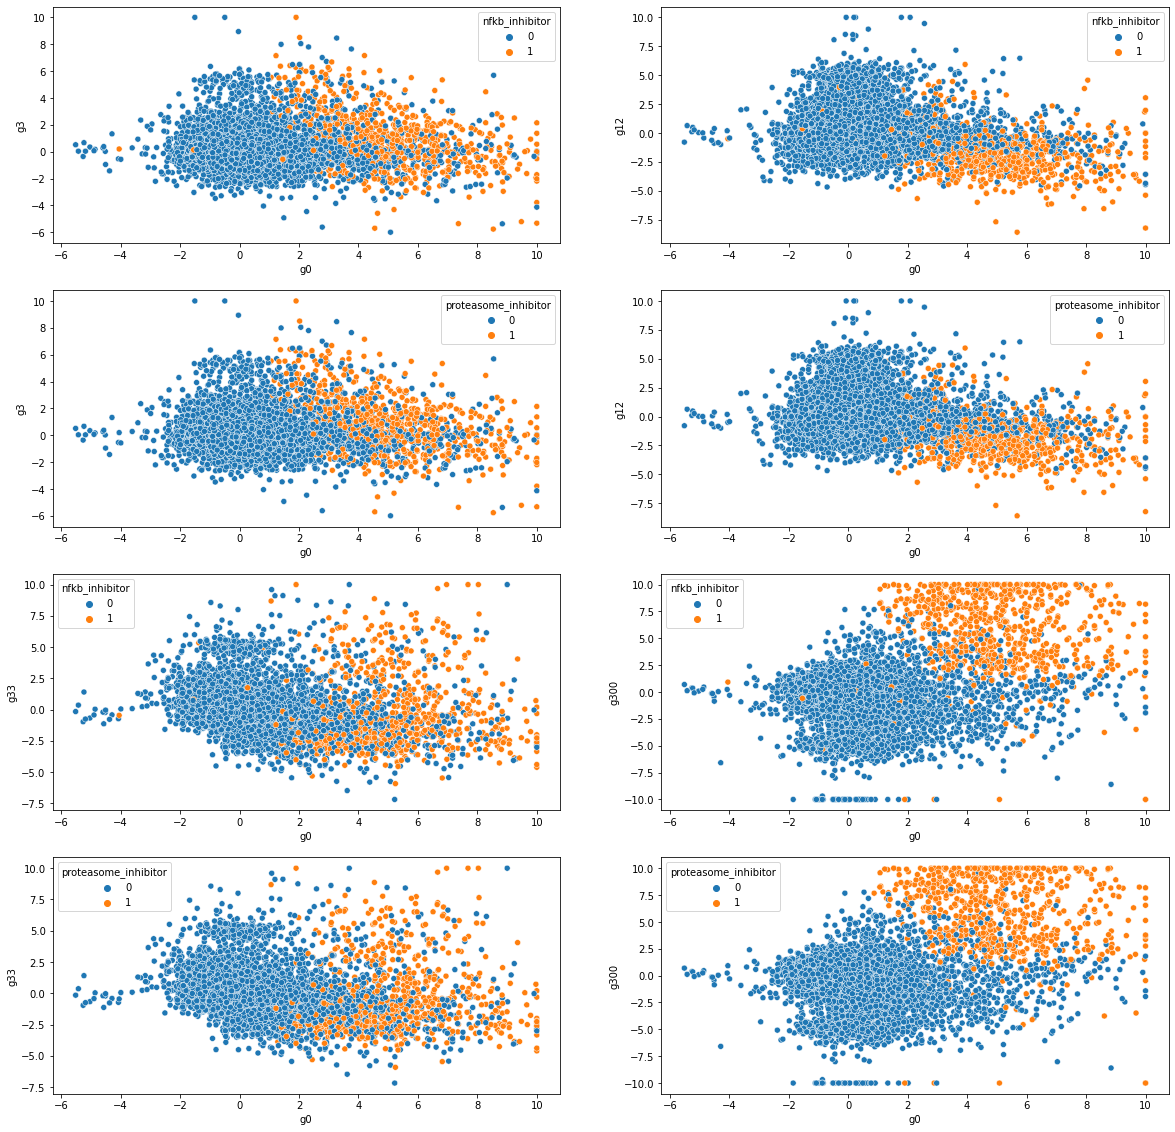

In [134]:
dados_combinados2 = pd.merge(dados, dados_resultados[['id','proteasome_inhibitor','nfkb_inhibitor']], on='id')
dados_combinados_SP = dados_combinados2.loc[:,'g0':'c99']
dados_combinados_SP['proteasome_inhibitor'] = dados_combinados2['proteasome_inhibitor'] 
dados_combinados_SP['nfkb_inhibitor'] = dados_combinados2['nfkb_inhibitor']
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
sns.scatterplot(x='g0', y = 'g3', data=dados_combinados_SP, hue='nfkb_inhibitor')
plt.subplot(4,2,2)
sns.scatterplot(x='g0', y = 'g12', data=dados_combinados_SP, hue='nfkb_inhibitor')
plt.subplot(4,2,3)
sns.scatterplot(x='g0', y = 'g3', data=dados_combinados_SP, hue='proteasome_inhibitor')
plt.subplot(4,2,4)
sns.scatterplot(x='g0', y = 'g12', data=dados_combinados_SP, hue='proteasome_inhibitor')
plt.subplot(4,2,5)
sns.scatterplot(x='g0', y = 'g33', data=dados_combinados_SP, hue='nfkb_inhibitor')
plt.subplot(4,2,6)
sns.scatterplot(x='g0', y = 'g300', data=dados_combinados_SP, hue='nfkb_inhibitor')
plt.subplot(4,2,7)
sns.scatterplot(x='g0', y = 'g33', data=dados_combinados_SP, hue='proteasome_inhibitor')
plt.subplot(4,2,8)
sns.scatterplot(x='g0', y = 'g300', data=dados_combinados_SP, hue='proteasome_inhibitor')


É possível observar nos gráficos acima uma separação em sub-grupos para os valores de ativo ou não de um efeito especifico que estamos analisando dos resultados. Essa configuração permite que visualizemos uma separação entre classes de forma mais evidente. Portanto, é possível que analisar efeitos específicos tornem o modelo mais fiel ao comportamento real do problema analisado.   

#Desafio 2
---
Não vai ser realizado neste Notebook por ser relativamente extenso

#Desafio 3
---
[Choosing the right estimator](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) é uma sessão do scikit learn que possui um fluxograma indicando uma função de classificação,clustering,regression,dimensionality regression de acordo com as características da base de dados que você está trabalhando. Por exemplo, se formos analisar o perfil dos candidatos eleitos na eleição de 2020 utilizando o [repositório do TSE](https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais), no intuito de ajudar os partidos a aprovarem seus candidatos mais aptos a serem eleitos com base nos gostos da população de eleições passadas, Trabalhariamos com uma base de dados contendo mais de 10000 registros de candidatos cujos resultados de eleitos já seria conhecido previamente; Com base nisso,  o site nos envia para uma categoria de classificadores supervisionados já que o resultado é conhecido, o site nos levaria a uma aproximação por kernel devido o número de dados, para classificação. O site ajuda a escolher as técnicas que mais se encaixam no problema abordado. 

#Desafio 4
---
Seria Possível prever os efeitos MOA que uma configuração de genes e células possui?

In [120]:
cm = dados_resultados.drop(['id','n_moa','ativo_moa'], axis=1).sum().sort_values(ascending=False)
moa_effects = list(cm.keys())

['nfkb_inhibitor',
 'proteasome_inhibitor',
 'cyclooxygenase_inhibitor',
 'dopamine_receptor_antagonist',
 'serotonin_receptor_antagonist',
 'dna_inhibitor',
 'glutamate_receptor_antagonist',
 'adrenergic_receptor_antagonist',
 'cdk_inhibitor',
 'egfr_inhibitor',
 'tubulin_inhibitor',
 'acetylcholine_receptor_antagonist',
 'pdgfr_inhibitor',
 'hmgcr_inhibitor',
 'calcium_channel_blocker',
 'flt3_inhibitor',
 'kit_inhibitor',
 'adrenergic_receptor_agonist',
 'sodium_channel_inhibitor',
 'glucocorticoid_receptor_agonist',
 'phosphodiesterase_inhibitor',
 'histamine_receptor_antagonist',
 'serotonin_receptor_agonist',
 'raf_inhibitor',
 'bacterial_cell_wall_synthesis_inhibitor',
 'acetylcholine_receptor_agonist',
 'vegfr_inhibitor',
 'gaba_receptor_antagonist',
 'estrogen_receptor_agonist',
 'pi3k_inhibitor',
 'mtor_inhibitor',
 'topoisomerase_inhibitor',
 'dopamine_receptor_agonist',
 'progesterone_receptor_agonist',
 'ppar_receptor_agonist',
 'bacterial_dna_inhibitor',
 'gaba_receptor_a

In [130]:
from sklearn import metrics
scores = []
for i in moa_effects[0:10]:
  dados_combinados2 = pd.merge(dados, dados_resultados[['id',i]], on='id')
  dados_combinados_Genes = dados_combinados2.loc[:,'g0':'c99']
  dados_combinados_Genes[i] = dados_combinados2[i]                        

  x = dados_combinados_Genes.select_dtypes('float64')
  y = dados_combinados_Genes[i]
  x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2)
  modelo_rlogistica = LogisticRegression(max_iter=1000)
  modelo_rlogistica.fit(x_treino, y_treino)
  scores.append(modelo_rlogistica.score(x_teste, y_teste))
print(scores)

[0.9874028973336133, 0.9997900482888935, 0.9718664707117363, 0.9739659878228007, 0.9794247323115683, 0.9741759395339072, 0.9792147806004619, 0.9762754566449716, 0.9937014486668067, 0.994331303800126]


Para os primeiros 10 efeitos MOA que estavam no ranking já citado neste notebook, treinamos 10 modelos de de regressão logistica e verificamos os scores desses modelos treinados. no trecho de código acima vemos um score relativamente alto para todos os 10 modelos criados dentro do For. Portanto, tentar basear as previsões nos efeitos MOA parece promissor tendo como base o score. Entretanto a conclusão não pode ser definitiva devido o desbalanceamento entre o número de variáveis 0 e o número de variáveis 1 para esses efeitos na tabela.

#Desafio 5
---

In [140]:
composto = dados_combinados['composto'].value_counts()
composto

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
bc21046fe       1
7226e2204       1
f5487e91f       1
19b95658c       1
a8ec8311e       1
Name: composto, Length: 3289, dtype: int64

1.0
[[ 115    0]
 [   0 4648]]


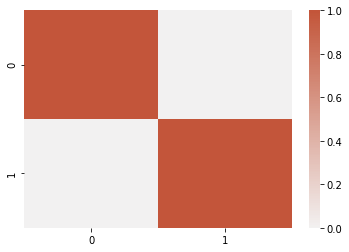

In [141]:
dados_combinados_Genes = dados_combinados.loc[:,'g0':'c99']
dados_combinados_Genes['87d714366'] = (dados_combinados['composto']== '87d714366')                        

x = dados_combinados_Genes.select_dtypes('float64')
y = dados_combinados_Genes['87d714366']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2)
modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
print(modelo_rlogistica.score(x_teste, y_teste))
x_predict = dados_combinados_Genes.loc[1,'g0':'c99']
y_predict = modelo_rlogistica.predict(x_teste)
mc = metrics.confusion_matrix(y_true=y_teste,y_pred=y_predict,labels=[1,0],normalize='true')
print(metrics.confusion_matrix(y_true=y_teste,y_pred=y_predict,labels=[1,0]))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mc, cmap=cmap, center=0)
plt.show()

#Desafio 6
---
Com os dados e as técnicas de machine learning ensinadas em aula foi possível verificar alguns valores com os quais os dados presentes na tabela de experimentos possuem mais relação quando comparados com a tabela resultados. Aprendemos que possivelmente a classificação dos dados de forma binária por meio da variável ativo_moa não faz sentido biologicamente falando por não expressar significado quando analisado em conjunto ao valor de genes e tipos celulares presente no dataset. Além disso, plotando scatterplots com hue relacionado a um efeito moa específico visualizamos que classificando por efeito MOA encontrado na tabela resultados demonstra ser uma classificação mais fácil de ser realizada devido a característica dos dados plotados serem mais facilmente separáveis. Portanto, seria possível criar um modelo ML com alto Score para classificar se um conjunto de dados possui um efeito MOA ou não por mais que as informções binárias ativo_moa ativo não expresse significado numérico nos dados de genes e celulas. Com os dados explorados hoje também foram exibidas algumas matrizes de confusão para visualizarmos os acertos dos modelos criados.